# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
df = pd.read_csv("car_data.csv")

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


# **Task 1**

In [ ]:
df1=df[['Price','Mileage']]
df1

,Price,Mileage
0,17314.103129,8221
1,17542.036083,9135
2,16218.847862,13196
3,16336.913140,16342
4,16339.170324,19832
...,...,...
799,16507.070267,16229
800,16175.957604,19095
801,15731.132897,20484
802,15118.893228,25979


In [ ]:
df1.isnull().sum()

Price      0
Mileage    0
dtype: int64

In [ ]:
df1.dtypes


Price      float64
Mileage      int64
dtype: object

In [ ]:
df1.describe()

,Price,Mileage
count,804.000000,804.000000
mean,21343.143767,19831.934080
std,9884.852801,8196.319707
min,8638.930895,266.000000
25%,14273.073870,14623.500000
50%,18024.995019,20913.500000
75%,26717.316636,25213.000000
max,70755.466717,50387.000000


In [ ]:
df1.corr()

,Price,Mileage
Price,1.000000,-0.143051
Mileage,-0.143051,1.000000


In [ ]:
#transforming the feature
df1['Mileage_trans']=np.power(df1['Mileage'],2)
df1.corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Price,Mileage,Mileage_trans
Price,1.000000,-0.143051,-0.117232
Mileage,-0.143051,1.000000,0.954664
Mileage_trans,-0.117232,0.954664,1.000000


In [ ]:
df1['Mileage_trans']=np.power(df1['Mileage'],3)
df1.corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Price,Mileage,Mileage_trans
Price,1.000000,-0.143051,-0.085018
Mileage,-0.143051,1.000000,0.858468
Mileage_trans,-0.085018,0.858468,1.000000


In [ ]:
df1['Mileage_trans']=np.power(df1['Mileage'],0.5)
df1.corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Price,Mileage,Mileage_trans
Price,1.000000,-0.143051,-0.149316
Mileage,-0.143051,1.000000,0.980307
Mileage_trans,-0.149316,0.980307,1.000000


In [ ]:
df1['Mileage_trans']=np.log(df1['Mileage'])
df1.corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Price,Mileage,Mileage_trans
Price,1.000000,-0.143051,-0.145424
Mileage,-0.143051,1.000000,0.896948
Mileage_trans,-0.145424,0.896948,1.000000


**No linearity between Price and Mileage**

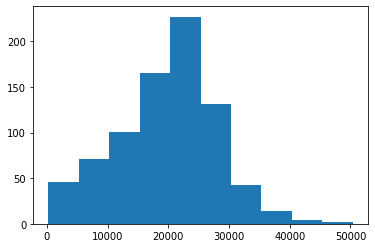

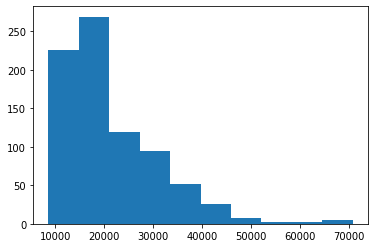

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df1['Mileage'])
plt.show()
plt.hist(df1['Price'])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(df1[['Mileage']],df1['Price'])
reg.score(df1[['Mileage']],df1['Price'])

0.02046344732348926

# POOR score

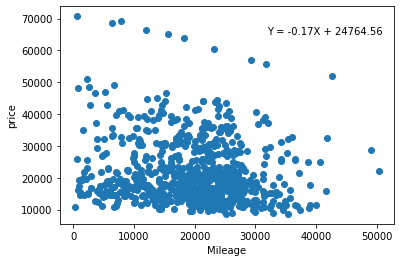

In [ ]:
plt.scatter(df1['Mileage'],df1['Price'])
plt.xlabel('Mileage')
plt.ylabel('price')
m=reg.coef_
c=reg.intercept_
m=m[0]
m=round(m,2)
c=round(c,2)
plt.text(x=32000,y=65000,s=f'Y = {m}X + {c}')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


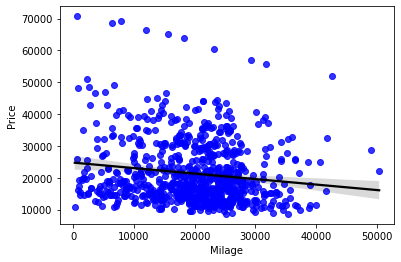

In [ ]:
import seaborn as sns
sns.regplot(df1["Mileage"],df1["Price"],scatter_kws={"color": "blue"}, line_kws={"color": "black"})
plt.xlabel("Milage")
plt.ylabel("Price")
plt.show()

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
df2=df[['Price','Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
df2.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,6,3.1,4,1,1,1
1,17542.036083,9135,6,3.1,4,1,1,0
2,16218.847862,13196,6,3.1,4,1,1,0
3,16336.913140,16342,6,3.1,4,1,0,0
4,16339.170324,19832,6,3.1,4,1,0,1


In [ ]:
# plt.figure(figsize=(50,50),dpi=50)
# plt.subplot(2,4,1)
# plt.scatter(df2.Price,df2.Mileage)
# plt.xlabel('price')
# plt.ylabel('Mileage')
# plt.title('Price Vs. Mileage')
# plt.subplot(2,4,2)
# plt.scatter(df2.Price,df2.Cylinder)
# plt.xlabel('price')
# plt.ylabel('Cylinder')
# plt.title('Price Vs. Cylinder')
# plt.subplot(2,4,3)
# plt.scatter(df2.Price,df2.Liter)
# plt.xlabel('price')
# plt.ylabel('Liter')
# plt.title('Price Vs. Liter')
# plt.subplot(2,4,4)
# plt.scatter(df2.Price,df2.Doors)
# plt.xlabel('price')
# plt.ylabel('Doors')
# plt.title('Price Vs. Doors')
# plt.subplot(2,4,5)
# plt.scatter(df2.Price,df2.Cruise)
# plt.xlabel('price')
# plt.ylabel('Cruise')
# plt.title('Price Vs. Cruise')
# plt.subplot(2,4,6)
# plt.scatter(df2.Price,df2.Sound)
# plt.xlabel('price')
# plt.ylabel('Sound')
# plt.title('Price Vs. Sound')
# plt.subplot(2,4,7)
# plt.scatter(df2.Price,df2.Leather)
# plt.xlabel('price')
# plt.ylabel('Leather')
# plt.title('Price Vs. Leather')
# plt.show()

In [ ]:
col=['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']
for i in col:
  df_1=pd.DataFrame(df2[['Price',i]].corr())
  # print(f'correlation of {i} with price is: {df_1.iloc[1,0]}')
  if df_1.iloc[1,0]>0.2:
    print(f'{i} has good correlation of {round(df_1.iloc[1,0],2)} with price')

Cylinder has good correlation of 0.57 with price
Liter has good correlation of 0.56 with price
Cruise has good correlation of 0.43 with price


**Cylinder, Liter and cruise have considerable linearity with price**

In [ ]:
x=df2[col].values
y=df2[['Price']].values
for i in col:
  reg.fit(df2[[i]].values,y)
  print(reg.score(df2[[i]].values,y))

0.02046344732348926
0.32385903759512247
0.31152674427904503
0.019251466591467037
0.1856330092969276
0.015462387624189389
0.024710851264124534


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
reg.fit(x_train,y_train)
print("R2 Score using '.score' method is : ",reg.score(x_train,y_train))
y_pred=reg.predict(x_test)

R2 Score using '.score' method is :  0.4518745991748532


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


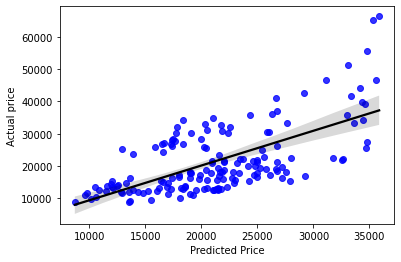

In [ ]:
y_pred=reg.predict(x_test)
sns.regplot(y_pred,y_test,scatter_kws={'color': 'blue'},line_kws={'color':'black'})
plt.xlabel("Predicted Price")
plt.ylabel("Actual price")
plt.show()

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
df3=df[['Price','Make','Model','Type']]
df3.head()

,Price,Make,Model,Type
0,17314.103129,Buick,Century,Sedan
1,17542.036083,Buick,Century,Sedan
2,16218.847862,Buick,Century,Sedan
3,16336.913140,Buick,Century,Sedan
4,16339.170324,Buick,Century,Sedan


In [ ]:
for i in ['Make','Model','Type']:
  print(df3[i].unique())
  print()
  print('-*-'*30)
  print()

['Buick' 'Cadillac' 'Chevrolet' 'Pontiac' 'SAAB' 'Saturn']

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

['Century' 'Lacrosse' 'Lesabre' 'Park Avenue' 'CST-V' 'CTS' 'Deville'
 'STS-V6' 'STS-V8' 'XLR-V8' 'AVEO' 'Cavalier' 'Classic' 'Cobalt'
 'Corvette' 'Impala' 'Malibu' 'Monte Carlo' 'Bonneville' 'G6' 'Grand Am'
 'Grand Prix' 'GTO' 'Sunfire' 'Vibe' '9_3' '9_3 HO' '9_5' '9_5 HO'
 '9-2X AWD' 'Ion' 'L Series']

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

['Sedan' 'Convertible' 'Hatchback' 'Coupe' 'Wagon']

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-



In [ ]:
x=pd.get_dummies(df,columns=['Make','Model','Type'])
x.drop('Price',axis=1,inplace=True)
x.drop('Trim',axis=1,inplace=True)
columns=x.columns
x.head()


,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,Make_Chevrolet,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,8221,6,3.1,4,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,9135,6,3.1,4,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,13196,6,3.1,4,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,16342,6,3.1,4,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,19832,6,3.1,4,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
A=[]
for i in range(len(columns)):
  df_1=pd.DataFrame(x.corr())
  # print(df_1.iloc[1,0])
  # print(f'correlation of {i} with price is: {df_1.iloc[1,0]}')
  for j in range(len(columns)):
    if df_1.iloc[i,j]>0.8 or df_1.iloc[i,j]<-0.8:
      if df_1.iloc[i,j]!=1.0:
        print(f'{columns[i]} has good correlation of {round(df_1.iloc[i,j],2)} with {columns[j]}')
        print('*'*50)
    else:
      A.append('No linearity found')
if len(A)==len(columns):
  print('No linearity found with Price')

Cylinder has good correlation of 0.96 with Liter
**************************************************
Liter has good correlation of 0.96 with Cylinder
**************************************************
Doors has good correlation of -0.83 with Type_Coupe
**************************************************
Make_Saturn has good correlation of 0.91 with Model_Ion
**************************************************
Model_Ion has good correlation of 0.91 with Make_Saturn
**************************************************
Type_Coupe has good correlation of -0.83 with Doors
**************************************************


**1.** **Cylinder has good correlation of 0.96 with Liter**

**2.** **Doors has good correlation of -0.83 with Type_Coupe**

**3.** **Model_Ion has good correlation of 0.91 with Make_Saturn**


In [ ]:
x['Price']=df['Price']
x.head()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,Make_Chevrolet,...,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon,Price
0,8221,6,3.1,4,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,17314.103129
1,9135,6,3.1,4,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,17542.036083
2,13196,6,3.1,4,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,16218.847862
3,16342,6,3.1,4,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,16336.913140
4,19832,6,3.1,4,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,16339.170324


In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x.drop(["Doors","Liter","Model_Ion","Make_Saturn","Price"],axis=1,inplace=True)
features=list(x.columns)
X=scale.fit_transform(x)
y=df["Price"]
from sklearn.metrics import r2_score as r2
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
r2(y_test,y_pred)

0.9800158099483356

In [ ]:
features=list(x.columns)
result=sorted([*zip(reg.coef_,features)],reverse=True,key=lambda x:abs(x[0]))
print("The important factors are:")
result[:15]

The important factors are:


[(-5414104250388810.0, 'Make_SAAB'),
 (3374631203646928.0, 'Model_9_3 HO'),
 (2941580586507725.0, 'Model_9_5'),
 (2417256140525678.0, 'Model_9_5 HO'),
 (2417256140525362.5, 'Model_9_3'),
 (-2160560583733032.8, 'Make_Buick'),
 (1731904042683158.0, 'Make_Chevrolet'),
 (1367991125028471.2, 'Model_Lacrosse'),
 (1340199053358823.5, 'Type_Sedan'),
 (1124152424152002.2, 'Model_Park Avenue'),
 (1124152424151408.4, 'Model_Lesabre'),
 (1092005013155291.2, 'Model_9-2X AWD'),
 (1041728390609586.0, 'Type_Coupe'),
 (-929797231986254.8, 'Model_AVEO'),
 (-929797231985778.1, 'Model_Cavalier')]